<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/test_forieh3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from my_func_pkg import exp_change

In [3]:
gold_df=yf.download(tickers='GC=F',period='max',interval='1d')

/tmp/ipython-input-3-817408109.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_df=yf.download(tickers='GC=F',period='max',interval='1d')
[*********************100%***********************]  1 of 1 completed


In [4]:
closes=gold_df.loc[:,"Close"].values.reshape(-1,)

In [5]:
ret=exp_change(closes)

In [11]:
from scipy.optimize import curve_fit
from tqdm import tqdm

In [84]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm

# Define the base function outside the class
def funct(x,a,b,c,d):
    return a+b*np.sin(c*x+d)

class Forie():
  def __init__(self,inp_ydata):
    self.y_data=inp_ydata
    self.x_data=np.arange(len(inp_ydata))
    self.all_constant_params=[]
    self.error = 1 # Initialize error


  def fit(self, max_iter):
    errc=1
    x_datac=self.x_data.copy()
    y_datac=self.y_data.copy()
    all_constant_paramsc=[]
    for i in tqdm(range(max_iter)):
      try:
        # Use the standalone funct
        paramsc, _ = curve_fit(funct,x_datac,y_datac)
        print(f"Iteration {i}: Fitted parameters: {paramsc}") # Print fitted parameters
        all_constant_paramsc.append(paramsc)
        y_all2=funct(x_datac,*paramsc)
        y_datac=y_datac-y_all2
        errc=np.mean(np.abs(y_datac)) # Calculate and print mean of absolute residual
        print(f"Iteration {i}: Mean absolute residual: {errc}")
      except Exception as e:
        print(f"Error at iteration {i}: {e}")
        continue
    self.all_constant_params=all_constant_paramsc
    self.error=errc

  def predict(self,inp_xdata):
    y_finalc=0
    for j in self.all_constant_params:
      # Use the standalone funct
      y_p=funct(inp_xdata,*j)
      y_finalc=y_finalc+y_p
    return y_finalc

In [114]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm

# Define the base function outside the class
def funct(x,a,b,c,d):
    return a+b*np.sin(c*x+d)

class Forie():
  def __init__(self,inp_ydata):
    self.y_data=inp_ydata
    self.x_data=np.arange(len(inp_ydata))
    self.all_constant_params=[]
    self.error = 1 # Initialize error


  def fit(self, max_iter):
    errc=1
    x_datac=self.x_data.copy()
    y_datac=self.y_data.copy()
    all_constant_paramsc=[]
    for i in tqdm(range(max_iter)):
      try:
        # Use the standalone funct
        paramsc, _ = curve_fit(funct,x_datac,y_datac)
        #print(f"Iteration {i}: Fitted parameters: {paramsc}") # Print fitted parameters
        all_constant_paramsc.append(paramsc)
        y_all2=funct(x_datac,*paramsc)
        y_datac=y_datac-y_all2
        errc=np.mean(np.abs(y_datac)) # Calculate and print mean of absolute residual
        #print(f"Iteration {i}: Mean absolute residual: {errc}")
      except Exception as e:
        #print(f"Error at iteration {i}: {e}")
        continue
    self.all_constant_params=all_constant_paramsc
    self.error=errc

  def predict(self,inp_xdata):
    y_finalc=0
    for j in self.all_constant_params:
      # Use the standalone funct
      y_p=funct(inp_xdata,*j)
      y_finalc=y_finalc+y_p
    return y_finalc

In [115]:
samp1=Forie(ret)

In [116]:
samp1.fit(1000)

100%|██████████| 1000/1000 [00:04<00:00, 214.40it/s]


In [119]:
samp1.all_constant_params[:5]

[array([1.00045996e+00, 1.98352156e-04, 9.99273047e-01, 3.74982120e+00]),
 array([ 3.86089837e-08,  1.49657912e-04,  1.00076997e+00, -3.35790230e-01]),
 array([-5.35648142e-08,  7.31269044e-05,  1.00004383e+00, -2.13670866e-01]),
 array([1.65737329e-08, 1.16680147e-06, 9.99999994e-01, 1.00002119e+00]),
 array([8.33721980e-12, 1.48456802e-11, 9.99999994e-01, 1.00002119e+00])]

In [117]:
samp1.all_constant_params[100]

array([4.75786077e-12, 1.80765403e-11, 9.99999994e-01, 1.00002119e+00])

In [106]:
xa=np.arange(len(ret),len(ret)+30)

In [110]:
ya=samp1.predict(xa)
ya

array([1.00152069, 1.00165866, 1.00069191, 0.99950905, 0.9992001 ,
       1.00005201, 1.00128218, 1.00175738, 1.00103768, 0.99978373,
       0.99915031, 0.99972288, 1.00097643, 1.00175691, 1.00134364,
       1.00011482, 0.99920139, 0.99944621, 1.00062627, 1.00165586,
       1.00158543, 1.00047737, 0.99935079, 0.99924425, 1.00025831,
       1.00146068, 1.00174335, 1.00084362, 0.99958826, 0.99913376])

In [109]:
y_back=samp1.predict(np.arange(len(ret)))

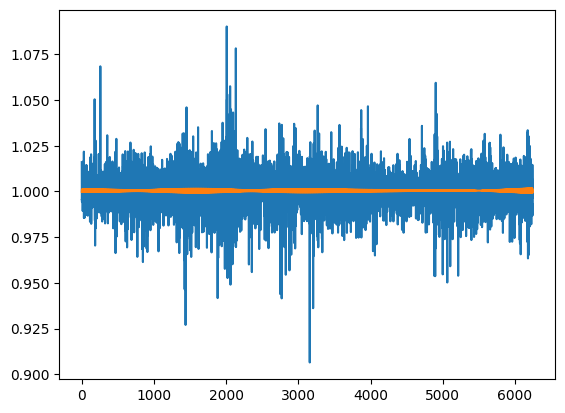

In [111]:
plt.plot(ret)
plt.plot(y_back)

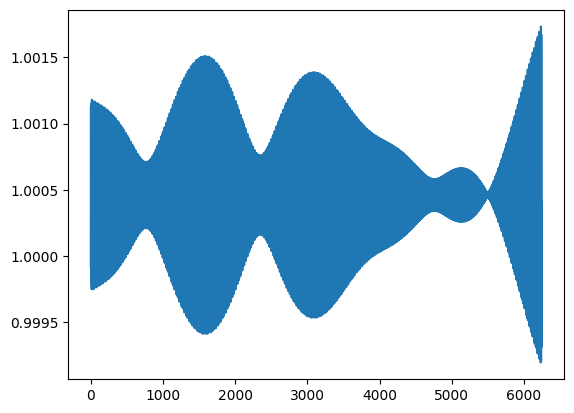

In [112]:
plt.plot(y_back)

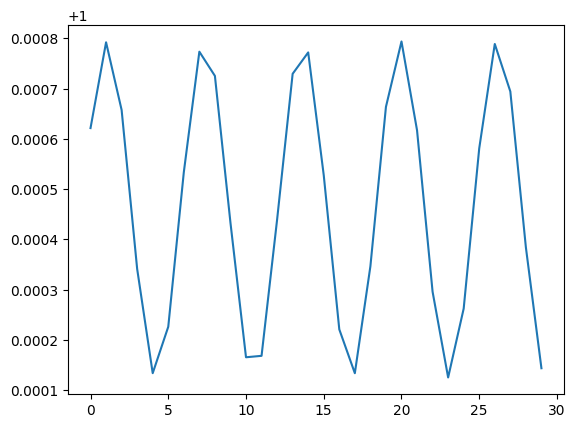

In [102]:
plt.plot(samp1.predict(xa))